# Assignments: Cleaning Data

## 1. Data in Python Request

* Read in data from the Excel spreadsheet (Alarm Survey Data.xlsx) and put into a Pandas DataFrame
* Check the data type of each column
* Convert object columns into numeric or datetime columns, as needed

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
alarm_survey_data = pd.read_excel('../Data/Alarm Survey Data.xlsx')

In [3]:
alarm_survey_data.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5 stars
1,2,31,3.0,light,3.0,3,3 stars
2,3,18,0.0,light_activity,4.0,1,1 stars
3,4,42,4.0,active,4.0,1,4 stars
4,5,30,1.0,light_activity,1.0,4,3 stars


In [4]:
alarm_survey_data.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating           object
dtype: object

In [5]:
alarm_survey_data['alarm_rating'] = alarm_survey_data['alarm_rating'].str.replace(' stars','')

In [6]:
alarm_survey_data.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,light,3.0,3,3
2,3,18,0.0,light_activity,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,light_activity,1.0,4,3


## 2. Missing Data Check

* Find any missing data
* Deal with the missing data

In [7]:
alarm_survey_data.isna().sum()
# there are only NaNs in the sleep_quality column 

survey_id               0
age                     0
number_of_children      0
activity_level          0
sleep_quality         351
number_of_snoozes       0
alarm_rating            0
dtype: int64

In [8]:
alarm_survey_data.isna().any(axis=1).sum()

351

In [9]:
alarm_survey_data[alarm_survey_data["sleep_quality"].isna()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
10,11,28,2.0,light_activity,NaN,3,4
18,19,38,2.0,lightly active,NaN,1,5
23,24,24,2.0,very active,NaN,1,5
26,27,25,2.0,lightly active,NaN,1,2
28,29,29,2.0,lightly active,NaN,1,2
...,...,...,...,...,...,...,...
6310,6311,30,2.0,very active,NaN,0,3
6319,6320,44,2.0,lightly active,NaN,0,3
6375,6309,32,3.0,light,NaN,0,3
6377,6311,30,2.0,very active,NaN,0,3


In [10]:
alarm_survey_data["sleep_quality"].value_counts(dropna = False)
# this shows that the missing value should be a 2, lets substitute with 2 where sleep_quality is NaN

sleep_quality
5.0    2721
4.0    2261
3.0     997
NaN     351
1.0     103
Name: count, dtype: int64

In [11]:
#alarm_survey_data["sleep_quality"] = np.where(alarm_survey_data["sleep_quality"].isna(), 2.0, alarm_survey_data["sleep_quality"])

In [12]:
alarm_survey_data.fillna(2, inplace = True)

In [13]:
alarm_survey_data.isna().sum()

survey_id             0
age                   0
number_of_children    0
activity_level        0
sleep_quality         0
number_of_snoozes     0
alarm_rating          0
dtype: int64

In [14]:
alarm_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6433 non-null   int64  
 1   age                 6433 non-null   int64  
 2   number_of_children  6433 non-null   float64
 3   activity_level      6433 non-null   object 
 4   sleep_quality       6433 non-null   float64
 5   number_of_snoozes   6433 non-null   int64  
 6   alarm_rating        6433 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 351.9+ KB


## 3. Inconsistent Text & Typos Check

* Find any inconsistent text and typos
* Deal with the inconsistent text and typos

In [15]:
alarm_survey_data.dtypes 

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating           object
dtype: object

In [16]:
#alarm_survey_data['number_of_children'] = np.where(alarm_survey_data['number_of_children']>=5.5, 5, alarm_survey_data['number_of_children'])

In [17]:
alarm_survey_data['activity_level'].value_counts(dropna = False)


activity_level
active            2450
lightly active    2289
light_activity     691
very active        669
light              334
Name: count, dtype: int64

In [18]:
activity_mapping =  {
    'lightly active': 'lightly active',
    'light': 'lightly active',
    'light_activity': 'lightly active',
    'active': 'active',
    'very active': 'very active'
}

In [19]:
alarm_survey_data.activity_level = alarm_survey_data.activity_level.map(activity_mapping)

## 4. Duplicate Data Check

* Find any duplicate data
* Deal with the duplicate data

In [20]:
alarm_survey_data[alarm_survey_data.duplicated()]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6366,6300,31,2.0,active,5.0,0,3
6367,6301,27,2.0,lightly active,4.0,0,2
6368,6302,41,3.0,lightly active,5.0,0,2
6369,6303,25,0.0,lightly active,5.0,0,5
6370,6304,25,1.0,lightly active,5.0,0,2
...,...,...,...,...,...,...,...
6428,6362,27,2.0,active,5.0,0,5
6429,6363,31,1.0,lightly active,4.0,0,4
6430,6364,26,0.0,lightly active,5.0,0,3
6431,6365,27,1.0,active,5.0,0,3


In [21]:
alarm_survey_data[alarm_survey_data['survey_id'] == 6303]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
6302,6303,25,0.0,lightly active,5.0,0,5
6369,6303,25,0.0,lightly active,5.0,0,5


In [22]:
alarm_survey_data.drop_duplicates(inplace = True)

In [23]:
alarm_survey_data.duplicated().sum()

0

## 5. Outliers Check

* Find any outliers
* Deal with the outliers

In [24]:
alarm_survey_data.head()

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
0,1,34,3.0,active,3.0,1,5
1,2,31,3.0,lightly active,3.0,3,3
2,3,18,0.0,lightly active,4.0,1,1
3,4,42,4.0,active,4.0,1,4
4,5,30,1.0,lightly active,1.0,4,3


<Axes: xlabel='number_of_snoozes'>

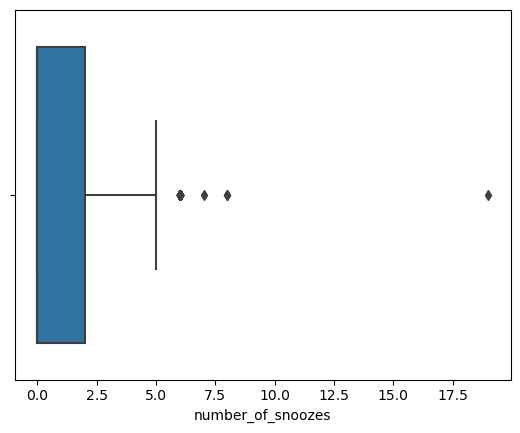

In [36]:
sns.boxplot(x=alarm_survey_data.number_of_snoozes)

In [42]:
alarm_survey_data[alarm_survey_data.number_of_snoozes > 12]


,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
749,750,19,1.0,lightly active,5.0,19,3


In [47]:
mean_snoozes = alarm_survey_data.number_of_snoozes.mean()
std_snoozes = alarm_survey_data.number_of_snoozes.std()

In [48]:
mean_snoozes, std_snoozes

(1.157869934024505, 1.6035281562013566)

In [49]:
min_snoozes = mean_snoozes - 3*std_snoozes
max_snoozes = mean_snoozes + 3*std_snoozes
min_snoozes, max_snoozes

(-3.6527145345795646, 5.968454402628575)

In [52]:
alarm_survey_data[alarm_survey_data['number_of_snoozes'] > 6]

,survey_id,age,number_of_children,activity_level,sleep_quality,number_of_snoozes,alarm_rating
735,736,34,3.0,active,3.0,8,3
749,750,19,1.0,lightly active,5.0,19,3
950,951,33,2.0,active,4.0,8,3
1583,1584,45,4.0,very active,5.0,7,5


In [54]:
alarm_survey_data = alarm_survey_data[alarm_survey_data['number_of_snoozes'] < 19]

## 6. Data Issues Check

* Quickly explore the updated DataFrame. How do things look now after handling the data issues compared to the original DataFrame?

In [55]:
alarm_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6365 entries, 0 to 6365
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survey_id           6365 non-null   int64  
 1   age                 6365 non-null   int64  
 2   number_of_children  6365 non-null   float64
 3   activity_level      6365 non-null   object 
 4   sleep_quality       6365 non-null   float64
 5   number_of_snoozes   6365 non-null   int64  
 6   alarm_rating        6365 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 397.8+ KB


In [57]:
alarm_survey_data.dtypes

survey_id               int64
age                     int64
number_of_children    float64
activity_level         object
sleep_quality         float64
number_of_snoozes       int64
alarm_rating           object
dtype: object

In [58]:
alarm_survey_data.describe()

,survey_id,age,number_of_children,sleep_quality,number_of_snoozes
count,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000
mean,3183.882325,29.076826,1.396936,4.107620,1.155067
std,1837.741432,7.476376,1.433575,0.963612,1.587979
min,1.000000,13.000000,0.000000,1.000000,0.000000
25%,1593.000000,23.000000,0.000000,4.000000,0.000000
50%,3184.000000,28.000000,1.000000,4.000000,0.000000
75%,4775.000000,34.000000,2.000000,5.000000,2.000000
max,6366.000000,47.000000,5.500000,5.000000,8.000000


In [59]:
alarm_survey_data['activity_level'].value_counts()

activity_level
lightly active    3287
active            2422
very active        656
Name: count, dtype: int64

## 7. Create Columns From Numeric Data

* Read data into Python
* Check the data type of each column
* Create a numeric column using arithmetic
* Create a numeric column using conditional logic

In [25]:
# Create a “Total Spend” column that includes both the pen cost and shipping cost for each sale
# Create a “Free Shipping” column that says yes if the sale included free shipping, and no otherwise

In [61]:
df = pd.read_excel('../Data/Pen Sales Data.xlsx')

In [63]:
df.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b..."
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...


In [64]:
df['Total Spend'] = df['Pen Cost'] + df['Shipping Cost']
df['Free Shipping'] = np.where(df['Shipping Cost'] == 0, 'yes', 'no')

In [65]:
df.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,no
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,yes
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,no
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,no
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,no


## 8. Create Columns From DateTime Data

* Calculate the difference between two datetime columns and save it as a new column
* Take the average of a column

In [26]:
# Calculate the number of days between the purchase and delivery date for each sale
# Save it as a new column called “Delivery Time”
# What were the average days from purchase to delivery?

In [82]:
df['Delivery Time'] = df['Delivery Date'] - df['Purchase Date']


In [83]:
df['Delivery Time'].mean()

Timedelta('3 days 05:45:36')

In [77]:
df['Delivery Time'] = df['Delivery Time'].astype(str)
df['Delivery Time'] = df['Delivery Time'].str.replace(' days','')
df['Delivery Time'] = df['Delivery Time'].astype(int)

In [80]:
df['Delivery Time'].mean()

3.24

## 9. Create Columns From Text Data

* Split one column into multiple columns
* Create a Boolean column (True / False) to show whether a text field contains particular words

In [27]:
# Split the reviews on the “|” character to create two new columns: “User Name” and “Review Text”
# Create a “Leak or Spill” column that flags the reviews that mention either “leak” or “spill”

In [84]:
df.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,no,2 days
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,yes,3 days
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,no,1 days
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,no,3 days
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,no,2 days


In [89]:
df[['User Name', 'Review Text']] = pd.DataFrame(df.Review.str.split('|').to_list())

In [100]:
df['Leak or Spill'] = df['Review Text'].str.lower().str.contains('leak|spill', regex = True)

In [101]:
df.head()

,Customer,Item,Pen Cost,Shipping Cost,Purchase Date,Delivery Date,Review,Total Spend,Free Shipping,Delivery Time,User Name,Review Text,Leak or Spill
0,5201,Ballpoint Pens,5.99,2.99,2023-05-01,2023-05-03,"DoodleWithMe|I love the way this pen writes, b...",8.98,no,2 days,DoodleWithMe,"I love the way this pen writes, but unfortunat...",True
1,5202,Sharpies,12.99,0.00,2023-05-01,2023-05-04,ScribbleMaster|The classic Sharpie marker has ...,12.99,yes,3 days,ScribbleMaster,"The classic Sharpie marker has a bold, permane...",False
2,5203,Ballpoint Pens (Bold),6.95,4.99,2023-05-01,2023-05-02,PenPalForever|The retractable ballpoint pen ha...,11.94,no,1 days,PenPalForever,"The retractable ballpoint pen has a durable, m...",False
3,5204,Gel Pens,5.99,2.99,2023-05-01,2023-05-04,TheWriteWay|This gel pen has a comfortable gri...,8.98,no,3 days,TheWriteWay,This gel pen has a comfortable grip and writes...,False
4,5205,Rollerball Pens,12.99,1.99,2023-05-01,2023-05-03,PenAndPaperPerson|The rollerball pen has a smo...,14.98,no,2 days,PenAndPaperPerson,"The rollerball pen has a smooth, fluid feel an...",False
